# Career Trajectory and Salary Forecast Analysis

This notebook explores and visualizes career progression and salary forecasting using Monte Carlo simulation. The analysis helps understand potential career paths and salary growth over time based on different career events:

- **New Job (0)**: Switching to a new company
- **Promotion (1)**: Getting promoted within the current company
- **Stay (2)**: Maintaining current position

The simulation takes into account:
1. Different growth factors for each career event
2. Tenure effects on transition probabilities
3. Seniority level progression
4. Random variations in salary increases

## Key Parameters
- Initial salary: 40,000 DKK
- Simulation length: 35 years
- Number of simulations: 500
- Growth factor distributions:
  - New job: μ=1.12, σ=0.05 (12% average increase)
  - Promotion: μ=1.08, σ=0.03 (8% average increase)
  - Stay: μ=1.03, σ=0.01 (3% average increase)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/vietnguyen/Finances')  # Add project root to Python path
from src.Advanced_salary_forecast import CareerSimulator, MC_simulation, salary_prediction
from src.transition_probabilities import transition_matrices2

In [2]:
# Define simulation parameters
growth_factor_distributions = {
    0: (1.12, 0.05),  # New job: mean and std
    1: (1.08, 0.03),  # Promotion
    2: (1.03, 0.01),  # Stay
}

# Simulation parameters
n_runs = 500
n_years = 35
initial_salary = 40_000
transition_matrix = transition_matrices2
decay = [0.025, 0.025, -0.05]

# Run Monte Carlo simulation
all_events, all_levels = MC_simulation(
    n_runs=n_runs,
    n_years=n_years,
    initial_salary=initial_salary,
    start_level=0,
    start_event=2,
    transition_matrix=transition_matrix,
    decay=decay
)

In [3]:
# Calculate salary trajectories with seniority adjustment
salary_trajectories, growth_factors = salary_prediction(
    events=all_events,
    levels=all_levels,
    initial_salary=initial_salary,
    growth_factor_distributions=growth_factor_distributions
)

## Salary Trajectory Analysis
Let's visualize the salary progression over time, including:
1. Mean salary trajectory
2. Confidence intervals (±1 standard deviation)
3. Distribution of possible outcomes

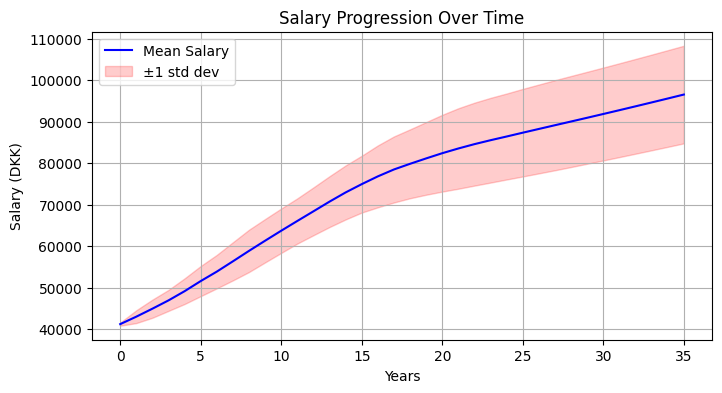

In [4]:
# Plot 1: Salary trajectories
plt.figure(figsize=(8, 4))
x = np.arange(n_years + 1)
mu = np.mean(salary_trajectories, axis=0)
sigma = np.std(salary_trajectories, axis=0)

plt.plot(x, mu, color="blue", label="Mean Salary")
plt.fill_between(x, mu-sigma, mu+sigma, color="red", alpha=0.2, label="±1 std dev")
plt.grid(True)
plt.title("Salary Progression Over Time")
plt.xlabel("Years")
plt.ylabel("Salary (DKK)")
plt.legend()
plt.show()

## Seniority Level Progression
Now let's analyze how seniority levels change over time across all simulations:

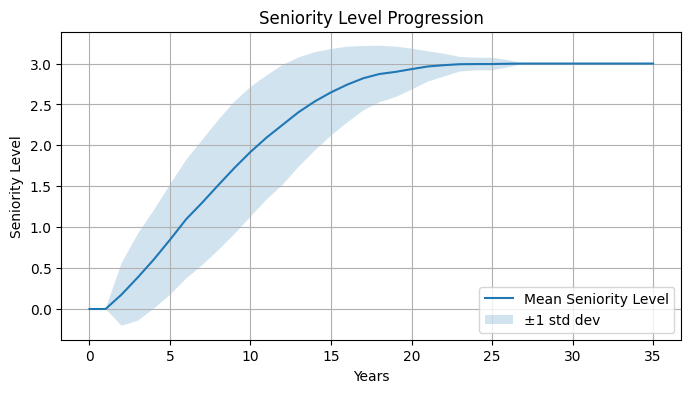

In [5]:
# Plot 2: Seniority levels
plt.figure(figsize=(8, 4))
mean = np.mean(all_levels, axis=0)
std = np.std(all_levels, axis=0)

plt.plot(x, mean, label="Mean Seniority Level")
plt.fill_between(x, mean - std, mean + std, alpha=0.2, label="±1 std dev")
plt.grid(True)
plt.title("Seniority Level Progression")
plt.xlabel("Years")
plt.ylabel("Seniority Level")
plt.legend()
plt.show()

## Analysis Summary

The simulation results show:

1. **Salary Growth**:
   - Mean salary progression over 35 years
   - Uncertainty bands showing potential variation in outcomes
   - The compound effect of different career events on salary growth

2. **Seniority Progression**:
   - Average rate of advancement in seniority levels
   - Variability in career progression paths
   - Impact of tenure and transitions on level advancement

These visualizations help understand both the expected career progression and the range of possible outcomes based on different career decisions and opportunities.